### TMU ITM618 Fall 2022 - Project

Your task is to develop a series of research hypotheses to predict recession based on theory or past empirical evidence and then apply some of the techniques covered in class to such data for testing.

Smoothed recession probabilities for the United States are obtained from a dynamic-factor Markov-switching model applied to four monthly coincident variables: non-farm payroll employment, the index of industrial production, real personal income excluding transfer payments, and real manufacturing and trade sales.

You can use the 10 Year-3 Month Treasury Yield Spread, which is the difference between the ten-year treasury rate and the three-month treasury rate. This spread is widely used as a gauge to study the yield curve. A 10-year-3-month treasury spread that approaches 0 signifies a "flattening" yield curve. Furthermore, a negative 10-year-3-month spread has historically been viewed as a precursor or predictor of a recessionary period. The New York Fed uses the rate in a model to predict recessions 2 to 6 quarters ahead.

### Data Set

Students are encouraged to collect data by themselves. Students can collect data from any sources
such as the following, but not limit to:
* TMU Library
* Yahoo Finance
* Or any other source

### Analysis and Report

Students should work closely on data collection, data analysis and result interpretation, report writing, etc. In the project report, students are supposed to describe the results and conclusion of their analysis. Keep in mind that plots, tables and other visual representations of data are useful in conveying your conclusions. In addition, you may want to include the following parts in your reports.

Questions/Hypotheses: Write one or multiple questions or hypotheses you want to explore with the data sets. After each question, state your expected answers, which may be different from your data analysis because you have not yet analyzed the data.

Data Description: Describe the data sets. What is the data, e.g., variables and results? How was the data collected? Briefly summarize the data. Provide the URL link if available.

Methodologies: Write a complete, clear description of the analysis you performed. This should be sufficient for someone else to write an R program to reproduce your results. It should also likely be helpful to people who read your code later. This section should tie your computations to your questions/hypotheses, indicating exactly what results would lead you to what conclusion. You may want to provide the key statistics, e.g., t-statistic, z-statistic, p-values, R2 and the adjusted R2, etc.

Results and Conclusion: Discuss your results. Focus in particular on the results that are most interesting, surprising, or important. Discuss the consequences or implications. Interpret the results: if the answers are unexpected, then see whether you can find an explanation for them, such as an external factor that your analysis did not account for. You may also want to make prediction for new scenarios.

Appendix: Put plots, tables, technical details or other results in appendix if necessary.

### Presentation

Each group should select one or multiple team members to present their projects in class. Each presentation should be no longer than 10 minutes. It is encouraged to use slides. The slide deck should summarize the main points of your project, including motivation, research questions, and results using, using Guy Kawasaki's presentation framework.

During the presentations, all students from not-presenting groups should actively ask questions. Each member of the presenting group, not only the presenters, can answer the questions or give comments.

### Project Submission

The student will submit once via D2L. Your submission should include a Jupyter notebook that includes a project report, Python script, and another zip file that includes the data set and the slides. It is suggested that the project reports should be 500-word maximum, excluding the appendix.

In [2]:
pip install stats-can

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install yfinance==0.1.86

Note: you may need to restart the kernel to use updated packages.


In [4]:
from datetime import datetime

import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import scipy as sp
import scipy.stats as stats
import stats_can
import statsmodels.api as sm

import yfinance as yf

In [5]:
SP= yf.Ticker("VOO")
SP

#leading up to, and during a recession, prices of stocks tend to decline ... add on to this 
#for this reason, we chose to use the S&P500 to represent an overview of the stock market. 
#Since 1950, the average decline for the S&P 500 during a recession is about 29%, 
#he said. So far this year, the S&P 500 has fallen nearly 24%.

yfinance.Ticker object <VOO>

In [6]:
View = SP.history(start="2022-01-02", end="2022-10-07")
View

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,427.266791,428.574159,425.032572,428.554657,6017300,0.0,0
2022-01-04 00:00:00-05:00,429.852271,430.515737,426.574099,428.379059,6262200,0.0,0
2022-01-05 00:00:00-05:00,428.096109,428.710774,420.046989,420.173828,7539600,0.0,0
2022-01-06 00:00:00-05:00,419.725013,422.290950,417.480998,419.607910,7971500,0.0,0
2022-01-07 00:00:00-05:00,419.734755,420.856748,416.798066,418.154205,6157500,0.0,0
...,...,...,...,...,...,...,...
2022-09-30 00:00:00-04:00,328.337224,331.911146,323.943850,324.121552,7736600,0.0,0
2022-10-03 00:00:00-04:00,327.567154,334.349712,325.898661,332.691101,5739000,0.0,0
2022-10-04 00:00:00-04:00,337.785445,342.909361,337.775562,342.790894,5110000,0.0,0


In [7]:
data = yf.download("VOO VNQ NQ=F", start="2022-01-02", end="2022-10-07")
data


#Industries affected most include retail, restaurants, travel/tourism, 
#leisure/hospitality, service purveyors, real estate, & manufacturing/warehouse.

#VOO is the S&P500, VNQ is a Real estate ETF, NQ=F is also similar to the S&P 500 but it combines 100 of the top preforming internation stocks. 

[*********************100%***********************]  3 of 3 completed


Adj Close                             Close              \
                NQ=F         VNQ         VOO      NQ=F         VNQ   
Date                                                                 
2022-01-03  16485.50  108.633881  428.554657  16485.50  115.099998   
2022-01-04  16275.75  108.501740  428.379028  16275.75  114.959999   
2022-01-05  15766.50  105.396568  420.173859  15766.50  111.669998   
2022-01-06  15759.00  105.490952  419.607910  15759.00  111.769997   
2022-01-07  15581.00  104.792519  418.154205  15581.00  111.029999   
...              ...         ...         ...       ...         ...   
2022-09-30  11035.50   77.394234  324.121582  11035.50   80.169998   
2022-10-03  11285.75   78.774727  332.691101  11285.75   81.599998   
2022-10-04  11640.75   80.367607  342.790894  11640.75   83.250000   
2022-10-05  11623.75   78.794037  342.198517  11623.75   81.620003   
2022-10-06  11541.75   76.602631  338.594971  11541.75   79.349998   

                            High                               Low  \
                   VOO      NQ=F         VNQ         VOO      NQ=F   
Date                                                                 
2022-01-03  439.250000  16508.00  116.239998  439.269989  16292.00   
2022-01-04  439.070007  16564.00  116.080002  441.260010  16139.50   
2022-01-05  430.660004  16269.00  114.800003  439.410004  15752.75   
2022-01-06  430.079987  15895.75  112.220001  432.829987  15598.50   
2022-01-07  428.589996  15852.75  111.849998  431.359985  15510.00   
...                ...       ...         ...         ...       ...   
2022-09-30  328.299988  11357.25   80.739998  336.190002  11024.25   
2022-10-03  336.980011  11358.25   82.110001  338.660004  10890.75   
2022-10-04  347.209991  11675.00   83.870003  347.329987  11281.50   
2022-10-05  346.609985  11711.00   82.250000  348.640015  11366.50   
2022-10-06  342.959991  11729.75   81.720001  347.980011  11505.25   

                                        Open                          Volume  \
                   VNQ         VOO      NQ=F         VNQ         VOO    NQ=F   
Date                                                                           
2022-01-03  113.459999  435.640015  16356.00  116.209999  437.929993  513549   
2022-01-04  114.860001  437.220001  16497.75  115.419998  440.579987  669527   
2022-01-05  111.550003  430.529999  16265.00  114.760002  438.779999  769790   
2022-01-06  110.599998  427.899994  15763.75  111.809998  430.200012  802950   
2022-01-07  110.760002  427.200012  15801.75  111.480003  430.209991  704406   
...                ...         ...       ...         ...         ...     ...   
2022-09-30   79.500000  328.119995  11220.00   79.699997  332.570007  878168   
2022-10-03   80.040001  330.100006  11030.00   81.400002  331.790009  757581   
2022-10-04   82.430000  342.130005  11314.50   82.550003  342.140015  772885   
2022-10-05   80.269997  340.859985  11630.25   82.120003  343.119995  700889   
2022-10-06   79.180000  342.489990  11628.00   81.389999  345.179993  773914   

                              
                VNQ      VOO  
Date                          
2022-01-03  9845000  6017300  
2022-01-04  5330700  6262200  
2022-01-05  6928300  7539600  
2022-01-06  5974500  7971500  
2022-01-07  6999300  6157500  
...             ...      ...  
2022-09-30  9023600  7736600  
2022-10-03  8718400  5739000  
2022-10-04  6439300  5110000  
2022-10-05  6518400  4755800  
2022-10-06  7820800  3879600  

[192 rows x 18 columns]

Text(0.5, 1.0, 'ADJ Close for NASDAQ 100 (NQ=F)')

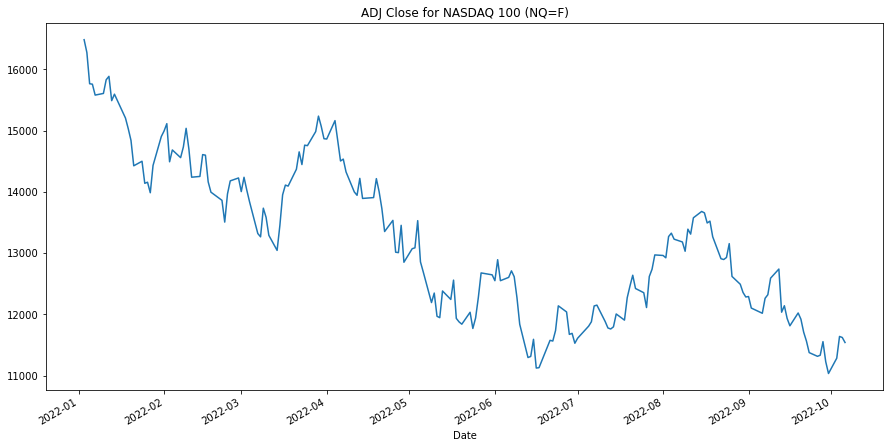

In [8]:
data['Adj Close','NQ=F'].plot(figsize =[15, 7.5])
plt.title('ADJ Close for NASDAQ 100 (NQ=F)')

Text(0.5, 1.0, 'ADJ Close for Vanguard 500 (VOO) and Vanguard Real Estate Index 1 (VNQ)')

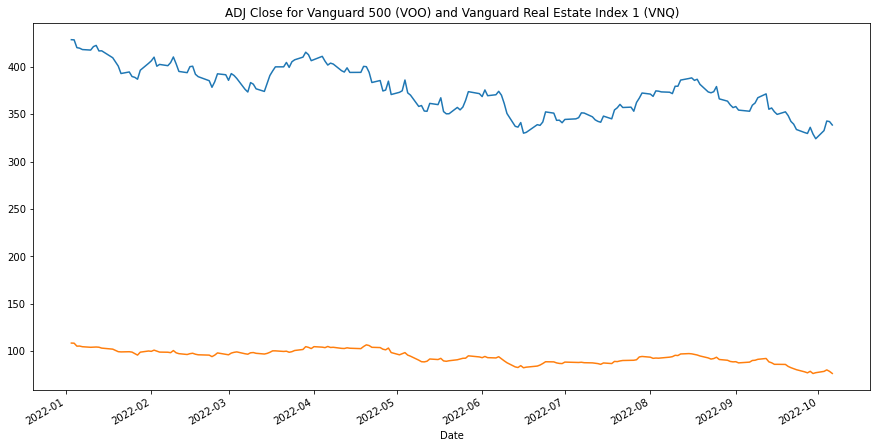

In [9]:
data['Adj Close','VOO'].plot(figsize=[15, 7.5])
data['Adj Close','VNQ'].plot(figsize=[15, 7.5])

plt.title('ADJ Close for Vanguard 500 (VOO) and Vanguard Real Estate Index 1 (VNQ)')

In [10]:
eco_vec_map = {'GDP':'v65201210',
               'Unemployment_Rate':'v2440389'}

In [11]:
#periods can be changed to adjust time period being plotted
vectors = list(eco_vec_map.values())
df = stats_can.sc.vectors_to_df(vectors, periods = 300)

In [12]:
inv_map = {v: k for k, v in eco_vec_map.items()}
df.columns = df.columns.to_series().map(inv_map)
df.index.names = ['Date']

array([[<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>]], dtype=object)

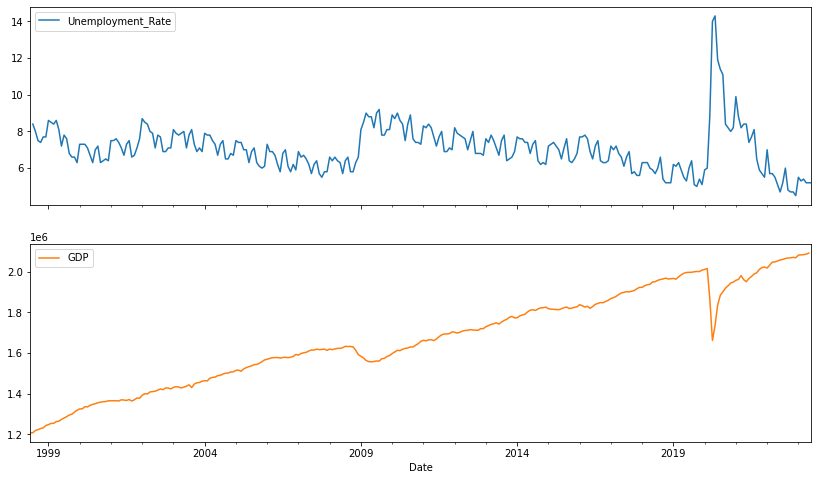

In [13]:
df.plot(subplots = True, figsize = (14,8), layout = (2,1))

In [14]:
df = pd.read_csv("Rates_data.csv")

In [15]:
x = []
y = []

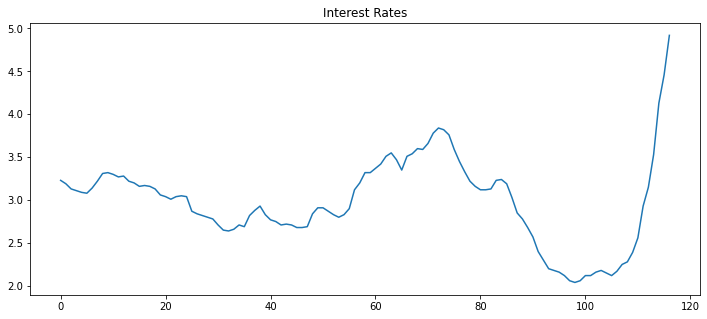

In [16]:
fig = plt.figure(figsize= [12, 5])
df['V122667775'].plot()
plt.title('Interest Rates')
plt.show()

Smoothed recession probabilities for the United States are 
obtained from a dynamic-factor Markov-switching model applied to four
monthly coincident variables: non-farm payroll employment, the index
of industrial production, real personal income excluding transfer
payments, and real manufacturing and trade sales.

In [17]:
#Datasets

df_e2 = pd.read_csv("Non-Farm Payroll Employment_%.csv", header=0, index_col=0, infer_datetime_format=True, parse_dates=['DATE'], dayfirst=True)
df_index = pd.read_csv("The Index of Industrial Production.csv", header=0, index_col=0, infer_datetime_format=True, parse_dates=['DATE'], dayfirst=True)
df_income = pd.read_csv("Real Personal Income Excluding Current Transfer Receipts.csv", header=0, index_col=0, infer_datetime_format=True, parse_dates=['DATE'], dayfirst=True)
df_sales = pd.read_csv("Real Manufacturing and Trade Sales.csv", header=0, index_col=0, infer_datetime_format=True, parse_dates=['DATE'], dayfirst=True)
df_rec = pd.read_csv("JHDUSRGDPBR.csv", header=0, index_col=0, infer_datetime_format=True, parse_dates=['DATE'], dayfirst=True)

In [18]:
df_e2

,PAYEMS,% chg
DATE,,
1980-01-01,90800,NaN
1980-02-01,90883,-0.091410
1980-03-01,90994,-0.122135
1980-04-01,90849,0.159351
1980-05-01,90420,0.472212
...,...,...
2022-04-01,151224,-0.243941
2022-05-01,151610,-0.255250
2022-06-01,151903,-0.193259


In [19]:
df_index

,INDPRO,% chg
DATE,,
1980-01-01,52.0677,0.000000
1980-02-01,52.0899,-0.042637
1980-03-01,51.8687,0.424650
1980-04-01,50.8454,1.972866
1980-05-01,49.5947,2.459810
...,...,...
2022-04-01,104.2709,-0.675088
2022-05-01,104.1646,0.101946
2022-06-01,104.0772,0.083906


In [20]:
df_income

,W875RX1,% chg
DATE,,
1980-01-01,4985.4,0.000000
1980-02-01,4965.6,0.397160
1980-03-01,4948.3,0.348397
1980-04-01,4938.4,0.200069
1980-05-01,4917.8,0.417139
...,...,...
2022-04-01,14505.4,-0.164346
2022-05-01,14514.6,-0.063425
2022-06-01,14457.8,0.391330


In [21]:
df_sales

,CMRMTSPL,% chg
DATE,,
1980-01-01,596439.789,0.000000
1980-02-01,590829.499,0.940630
1980-03-01,577376.228,2.277014
1980-04-01,565015.820,2.140789
1980-05-01,557782.101,1.280268
...,...,...
2022-04-01,1551827.000,0.141825
2022-05-01,1541414.000,0.671016
2022-06-01,1536205.000,0.337936


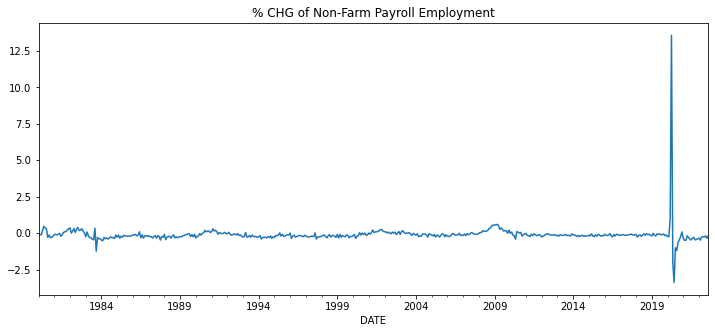

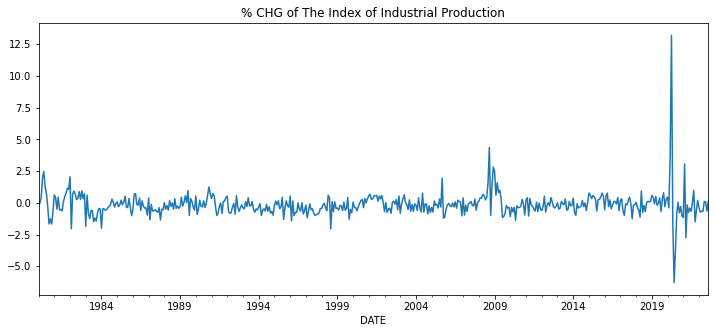

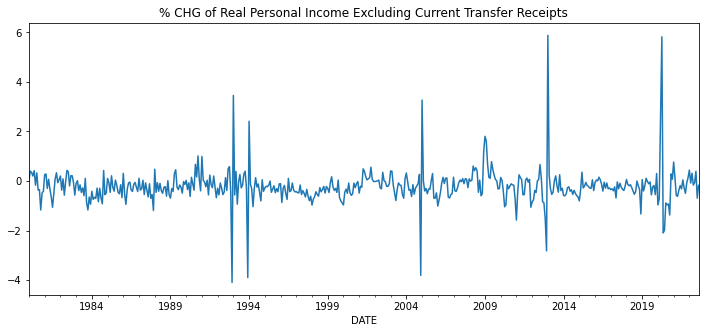

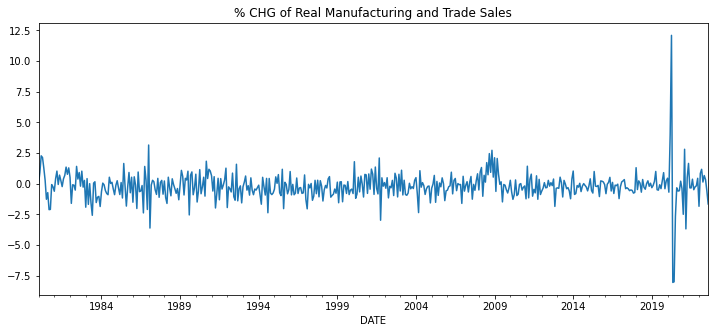

In [22]:
#The Graphs for % Change

fig = plt.figure(figsize= [12, 5])
df_e2['% chg'].plot()
plt.title('% CHG of Non-Farm Payroll Employment')
plt.show()
 
fig = plt.figure(figsize= [12, 5])
df_index['% chg'].plot()
plt.title('% CHG of The Index of Industrial Production')
plt.show()

fig = plt.figure(figsize= [12, 5])
df_income['% chg'].plot()
plt.title('% CHG of Real Personal Income Excluding Current Transfer Receipts')
plt.show()
 
fig = plt.figure(figsize= [12, 5])
df_sales['% chg'].plot()
plt.title('% CHG of Real Manufacturing and Trade Sales')
plt.show()

In [23]:
#Fitting the Markov Model

msdr_model = sm.tsa.MarkovRegression(endog=df_index['% chg'], k_regimes=2, trend='c', exog=df_sales['% chg'], switching_variance=True)
msdr_model_results = msdr_model.fit(iter=10000)


C:\Users\amray\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\amray\anaconda3\lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: iter. After release 0.14, this will raise.
  warnings.warn(


In [24]:
print(msdr_model_results.summary())

                        Markov Switching Model Results                        
Dep. Variable:                  % chg   No. Observations:                  512
Model:               MarkovRegression   Log Likelihood                -410.204
Date:                Sun, 30 Jul 2023   AIC                            836.408
Time:                        04:31:10   BIC                            870.315
Sample:                    01-01-1980   HQIC                           849.700
                         - 08-01-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1608      0.026     -6.071      0.000      -0.213      -0.109
x1             0.2025      0.025      8.007      0.0

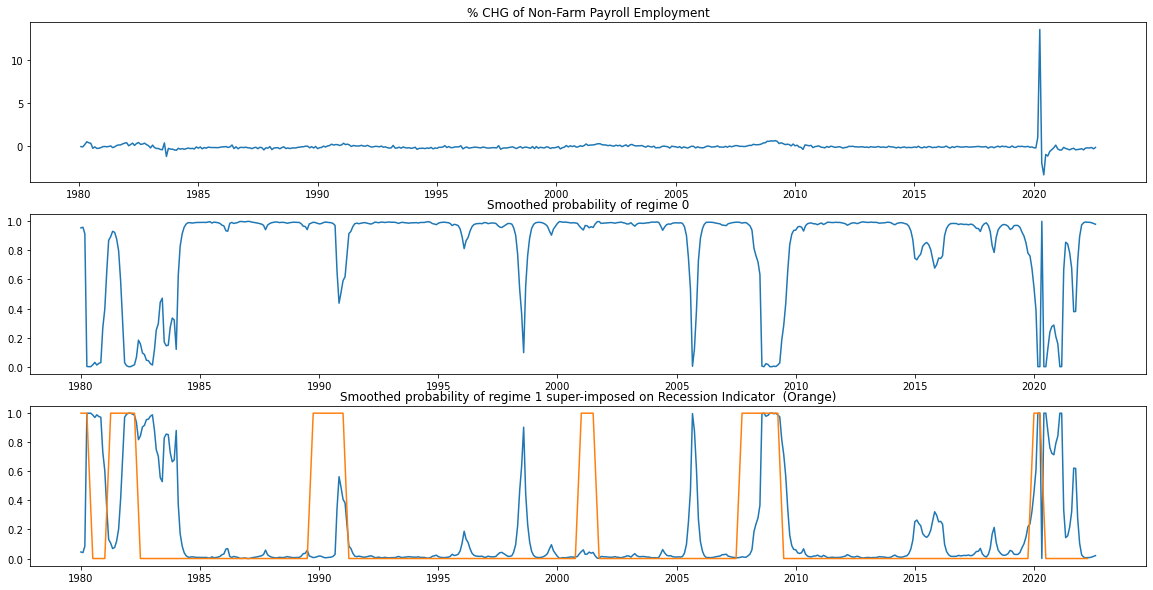

In [25]:
#Markov Model of Non-Farm Payroll Employment

figure, axes = plt.subplots(3, figsize=(20, 10))

ax = axes[0]
ax.plot(df_e2.index, df_e2['% chg'])
ax.set(title='% CHG of Non-Farm Payroll Employment')

ax = axes[1]
ax.plot(df_e2.index, msdr_model_results.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of regime 0')
 
ax = axes[2]
ax.plot(df_e2.index, msdr_model_results.smoothed_marginal_probabilities[1])
ax.plot(df_rec.index, df_rec['JHDUSRGDPBR'])
ax.set(title='Smoothed probability of regime 1 super-imposed on Recession Indicator  (Orange)')
 
plt.show()

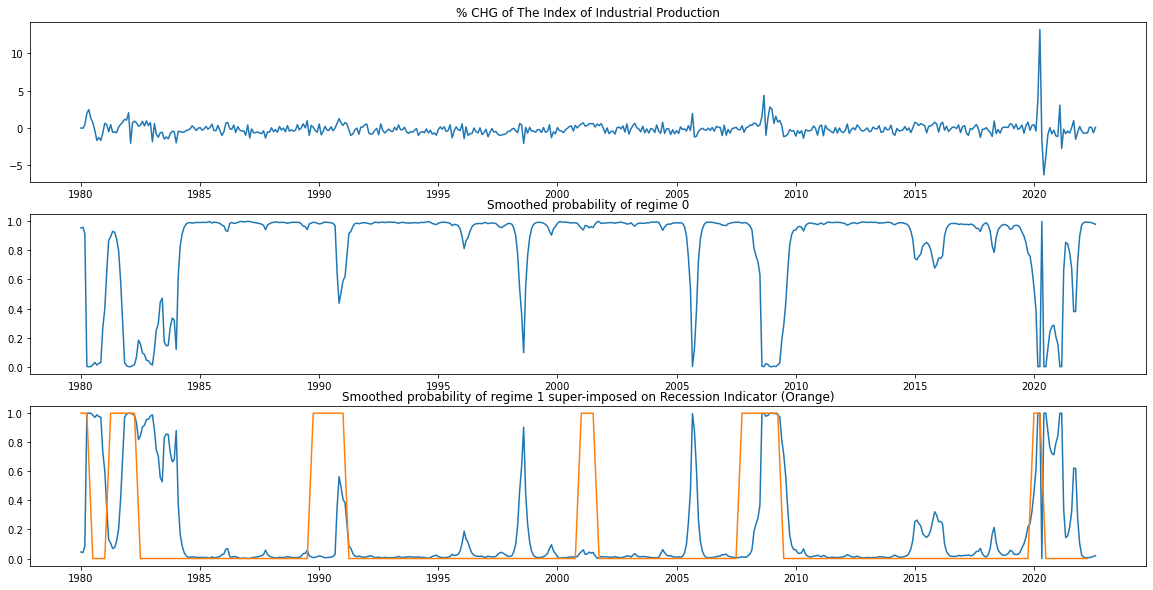

In [26]:
#Markov Model of The Index of Industrial Production

figure, axes = plt.subplots(3, figsize=(20, 10))

ax = axes[0]
ax.plot(df_index.index, df_index['% chg'])
ax.set(title='% CHG of The Index of Industrial Production')

ax = axes[1]
ax.plot(df_index.index, msdr_model_results.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of regime 0')
 
ax = axes[2]
ax.plot(df_index.index, msdr_model_results.smoothed_marginal_probabilities[1])
ax.plot(df_rec.index, df_rec['JHDUSRGDPBR'])
ax.set(title='Smoothed probability of regime 1 super-imposed on Recession Indicator (Orange)')
 
plt.show()

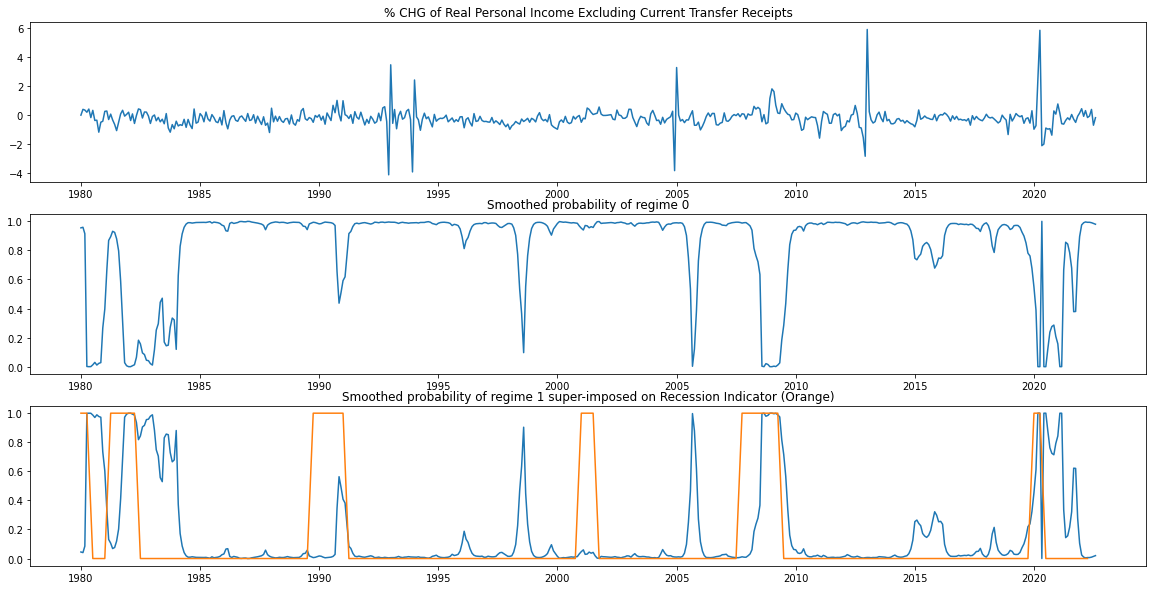

In [27]:
#Markov Model of Real Personal Income Excluding Current Transfer Receipts
figure, axes = plt.subplots(3, figsize=(20, 10))

ax = axes[0]
ax.plot(df_income.index, df_income['% chg'])
ax.set(title='% CHG of Real Personal Income Excluding Current Transfer Receipts')

ax = axes[1]
ax.plot(df_income.index, msdr_model_results.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of regime 0')
 
ax = axes[2]
ax.plot(df_income.index, msdr_model_results.smoothed_marginal_probabilities[1])
ax.plot(df_rec.index, df_rec['JHDUSRGDPBR'])
ax.set(title='Smoothed probability of regime 1 super-imposed on Recession Indicator (Orange)')
 
plt.show()

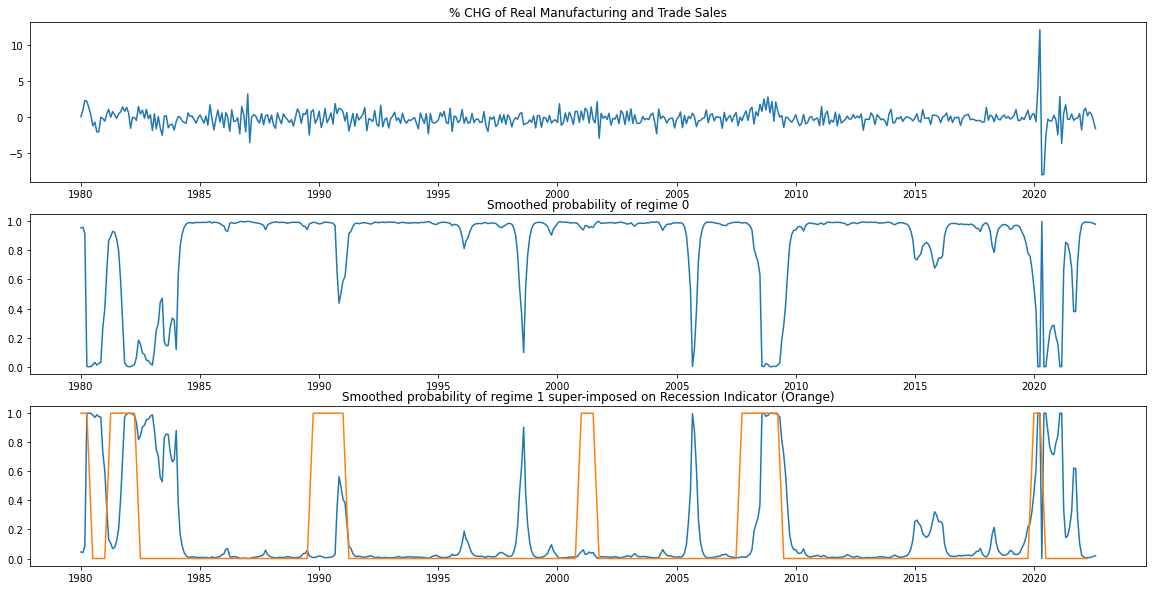

In [28]:
#Markov Model of Real Manufacturing and Trade Sales

figure, axes = plt.subplots(3, figsize=(20, 10))

ax = axes[0]
ax.plot(df_sales.index, df_sales['% chg'])
ax.set(title='% CHG of Real Manufacturing and Trade Sales')

ax = axes[1]
ax.plot(df_sales.index, msdr_model_results.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of regime 0')
 
ax = axes[2]
ax.plot(df_sales.index, msdr_model_results.smoothed_marginal_probabilities[1])
ax.plot(df_rec.index, df_rec['JHDUSRGDPBR'])
ax.set(title='Smoothed probability of regime 1 super-imposed on Recession Indicator (Orange)')
 
plt.show()